In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
# Load data about clubs
clubs_info_df = pd.read_json("../../parsing/parsedData/transfer_balance.json")
clubs_info_df.head(15)

,TeamID,Year,TransferBalanceValue,TransferBalanceMer
0,418,2019,"-224,50",млн €
1,418,2018,"-28,65",млн €
2,418,2017,"+92,00",млн €
3,418,2015,"-76,25",млн €
4,418,2020,"+108,20",млн €
5,418,2022,"+12,15",млн €
6,281,2014,"-72,50",млн €
7,418,2024,"-33,00",млн €
8,418,2016,"+7,50",млн €
9,281,2018,"-20,99",млн €


In [3]:
# Show shape
clubs_info_df.shape

(5896, 4)

In [4]:
# Check data types
clubs_info_df.dtypes

TeamID                   int64
Year                     int64
TransferBalanceValue    object
TransferBalanceMer      object
dtype: object

In [5]:
# Check axes
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID ', 'Year', 'TransferBalanceValue', 'TransferBalanceMer'], dtype='object')]

In [6]:
# Remove redundant symbols from column names
clubs_info_df.columns = clubs_info_df.columns.str.strip()
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID', 'Year', 'TransferBalanceValue', 'TransferBalanceMer'], dtype='object')]

In [7]:
# Investigate unique values within "TransferBalanceMer" column
clubs_info_df.TransferBalanceMer.unique()

array(['млн €', 'тыс €', None], dtype=object)

In [8]:
# Check рщц numbers with "тыс" value in TransferBalanceMer are represented
clubs_info_df.query("TransferBalanceMer == 'тыс €'")

,TeamID,Year,TransferBalanceValue,TransferBalanceMer
231,2282,2015,-590,тыс €
233,2282,2016,+150,тыс €
249,234,2016,-900,тыс €
251,398,2022,+698,тыс €
276,24,2014,-575,тыс €
...,...,...,...,...
5841,27774,2014,+257,тыс €
5843,27774,2021,+10,тыс €
5848,27774,2023,+20,тыс €
5849,27774,2022,+175,тыс €


In [9]:
# Investigate NaNs
clubs_info_df.isna().sum()

TeamID                     0
Year                       0
TransferBalanceValue       0
TransferBalanceMer      2180
dtype: int64

In [10]:
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"TransferBalanceMer": "count"}) \
    .query("TransferBalanceMer != 11") \
    .TeamID \
    .unique()

array([   43,    61,    77,    84,   156,   163,   169,   172,   208,
         253,   282,   312,   317,   321,   329,   331,   338,   365,
         369,   370,   383,   403,   413,   422,   428,   429,   433,
         465,   503,   504,   520,   534,   535,   602,   621,   628,
         634,   653,   663,   667,   675,   697,   708,   709,   710,
         715,   759,   786,   789,   790,   810,   829,   853,   903,
         920,   938,   941,   967,   987,  1002,  1004,  1007,  1008,
        1033,  1058,  1059,  1063,  1096,  1100,  1101,  1102,  1115,
        1167,  1177,  1180,  1185,  1189,  1225,  1242,  1251,  1257,
        1274,  1293,  1301,  1304,  1322,  1391,  1435,  1443,  1519,
        1839,  1918,  2049,  2156,  2259,  2311,  2381,  2423,  2424,
        2481,  2553,  2573,  2578,  2671,  2714,  2740,  2761,  2782,
        2790,  2817,  2844,  2861,  2925,  2944,  2950,  2995,  3060,
        3070,  3137,  3189,  3237,  3258,  3426,  3461,  3463,  3471,
        3508,  3551,

In [11]:
# Try to remove teams with missing values and see how many rows we will have as a result
teams_with_missing_values = clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"TransferBalanceMer": "count"}) \
    .query("TransferBalanceMer != 11") \
    .TeamID \
    .unique()
    
clubs_info_df.drop(clubs_info_df[clubs_info_df["TeamID"].isin(teams_with_missing_values)].index, inplace=True)
clubs_info_df.head()

,TeamID,Year,TransferBalanceValue,TransferBalanceMer
0,418,2019,"-224,50",млн €
1,418,2018,"-28,65",млн €
2,418,2017,"+92,00",млн €
3,418,2015,"-76,25",млн €
4,418,2020,"+108,20",млн €


In [12]:
# The resulting shape is
clubs_info_df.shape

(1859, 4)

Okay, since we have values in "TransferBalanceValue" that are not scaled according to "тыс" (thousand) or "млн" (million), let us merge last two columns, replace the first one with space, and the second one with one zero, so that every number will represent amount of thousands in transfer balance column

In [13]:
# Merge two columns
clubs_info_df["TransferBalance"] = clubs_info_df["TransferBalanceValue"] + clubs_info_df["TransferBalanceMer"]
clubs_info_df.head()

,TeamID,Year,TransferBalanceValue,TransferBalanceMer,TransferBalance
0,418,2019,"-224,50",млн €,"-224,50млн €"
1,418,2018,"-28,65",млн €,"-28,65млн €"
2,418,2017,"+92,00",млн €,"+92,00млн €"
3,418,2015,"-76,25",млн €,"-76,25млн €"
4,418,2020,"+108,20",млн €,"+108,20млн €"


In [14]:
# Drop two old columns, we do not need them anymore
clubs_info_df.drop(["TransferBalanceValue", "TransferBalanceMer"], axis=1, inplace=True)
clubs_info_df.head()

,TeamID,Year,TransferBalance
0,418,2019,"-224,50млн €"
1,418,2018,"-28,65млн €"
2,418,2017,"+92,00млн €"
3,418,2015,"-76,25млн €"
4,418,2020,"+108,20млн €"


In [15]:
# Replace "млн" (million) and "тыс" (thousand) accordingly
clubs_info_df["TransferBalance"] = clubs_info_df["TransferBalance"] \
                                    .str.replace("млн", "0") \
                                    .str.replace("тыс", "") \
                                    .str.replace(",", "") \
                                    .str.replace("€", "") \
                                    .str.strip()
clubs_info_df.head(15)

,TeamID,Year,TransferBalance
0,418,2019,-224500
1,418,2018,-28650
2,418,2017,+92000
3,418,2015,-76250
4,418,2020,+108200
5,418,2022,+12150
6,281,2014,-72500
7,418,2024,-33000
8,418,2016,+7500
9,281,2018,-20990


In [16]:
# Check data types again
clubs_info_df.dtypes

TeamID              int64
Year                int64
TransferBalance    object
dtype: object

In [17]:
# Convert "TeamID" to object and "TransferBalance" to int for better visualization
clubs_info_df.TeamID = clubs_info_df.TeamID.astype(object)
clubs_info_df.TransferBalance = clubs_info_df.TransferBalance.astype(int)

clubs_info_df.dtypes

TeamID             object
Year                int64
TransferBalance     int64
dtype: object

In [18]:
clubs_info_df.sort_values(by="TransferBalance", ascending=False).head(10)

,TeamID,Year,TransferBalance
564,162,2018,221400
155,294,2019,175290
4733,180,2023,165690
67,46,2021,163000
163,294,2022,162570
311,610,2019,158950
76,16,2017,148360
160,294,2017,127390
91,631,2019,118070
194,720,2024,116740


In [19]:
clubs_info_df

,TeamID,Year,TransferBalance
0,418,2019,-224500
1,418,2018,-28650
2,418,2017,92000
3,418,2015,-76250
4,418,2020,108200
...,...,...,...
5713,3709,2021,5840
5714,3709,2024,21600
5715,3709,2023,-3640
5722,3709,2022,4750


**Hypothesis: some countries represented by their clubs mostly sell players, while other ones mostly buy playes**

<Figure size 1200x800 with 0 Axes>

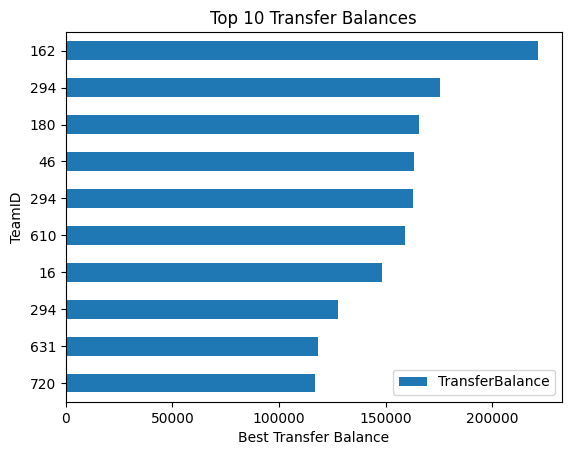

In [20]:
# Visualize teams that are best in sales
plt.figure(figsize=(12, 8))
clubs_info_df.sort_values(by="TransferBalance", ascending=True).tail(10).plot(x="TeamID", y="TransferBalance", kind="barh")
plt.xlabel("Best Transfer Balance")
plt.ylabel("TeamID")
plt.title("Top 10 Transfer Balances")
None

**We obtained such a plot, where we see the following teams: 162 - Monaco (France), 294 - Benfica (Portual), 180 - Southampton (England), 46 - Inter Milan (Italy), 610 - Ajax (Netherlands), 16 - Borussia Dortmund (Germany), 631 - Chelsea (England), 720 - Porto (Portugal). \
Probably, we may say that that results are either inconclusive or we should talk about clubs-sellers rather than countries, but 4 out of 10 appearances of clubs from Portugal is not a coincidence, as well as Ajax's one, which is popular for its top sells**

In [23]:
# Sort Data Frame by "TeamID" and "Year"
clubs_info_df.sort_values(by=["TeamID", "Year"], inplace=True)
clubs_info_df.head(12)

,TeamID,Year,TransferBalance
2174,3,2014,-8300
2179,3,2015,-1730
2175,3,2016,10650
2176,3,2017,-32550
2178,3,2018,29900
2180,3,2019,-13400
2200,3,2020,-3500
2181,3,2021,22900
2182,3,2022,6070
2210,3,2023,600


In [22]:
# Write results to a file
with open("transfer_balance.json", "w") as file:
    json.dump(clubs_info_df.to_dict(orient="records"), file, indent=4)